# In this notebook we will preprocess the data extracted from linkedin profiles and extract skills from each description

## Importing data after web scraping 

In [2]:
import pandas as pd 
df=pd.read_excel('final_data_scrap.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13003 entries, 0 to 13002
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   poste         13003 non-null  object
 1   company_name  13003 non-null  object
 2   date          13003 non-null  object
 3   description   13002 non-null  object
 4   faculte       13003 non-null  object
dtypes: object(5)
memory usage: 508.1+ KB


In [5]:
df.head()

,poste,company_name,date,description,faculte
0,AI project Manager,Tassahil Center for Intelligent SolutionsTassa...,janv. 2022 - déc. 2022 · 1 an,Compétences Scrum,-
1,Artificial intelligence and Data Science engineer,Tassahil Center for Intelligent SolutionsTassa...,oct. 2020 - déc. 2022 · 2 ans 3 mois,Compétences Apprentissage automatique SPARQL ...,-
2,Stagiaire chez HNC&D,HNC&d · Stage,févr. 2020 - juil. 2020 · 6 mois,Réalisation dune plateforme danalyses des sent...,-
3,Stagiaire,DITRIOT · Stage,juil. 2019 - août 2019 · 2 mois,Réalisation dun robot assistant à laide des AP...,-
4,Full-stack Developer intern,Telnet · Stage,juil. 2021 - août 2021 · 2 mois,Design implementation of a performant Recruitm...,-


In [6]:
df.columns

Index(['poste', 'company_name', 'date', 'description', 'faculte'], dtype='object')

In [7]:
df['faculte'].unique()

array(['-', 'esprit'], dtype=object)

In [13]:
len(df)

13003

# Checking for Nan values
### Missing values

In [4]:
total_missing = df.isna().sum().sum()
print("Total number of missing values: ", total_missing)

Total number of missing values:  0


### Data Overview
#### Poste column : mean the job title of the experience 
#### company_name : the name of the company 
#### date: the start date and the end date of an experience
#### description : the description of the experience and skills used in that experience 
#### faculte : the university where did the Individual of the experience studied 

In [5]:
df.head()

,poste,company_name,date,description,faculte
0,AI project Manager,Tassahil Center for Intelligent SolutionsTassa...,janv. 2022 - déc. 2022 · 1 an,Compétences Scrum,-
1,Artificial intelligence and Data Science engineer,Tassahil Center for Intelligent SolutionsTassa...,oct. 2020 - déc. 2022 · 2 ans 3 mois,Compétences Apprentissage automatique SPARQL ...,-
2,Stagiaire chez HNC&D,HNC&d · Stage,févr. 2020 - juil. 2020 · 6 mois,Réalisation dune plateforme danalyses des sent...,-
3,Stagiaire,DITRIOT · Stage,juil. 2019 - août 2019 · 2 mois,Réalisation dun robot assistant à laide des AP...,-
4,Full-stack Developer intern,Telnet · Stage,juil. 2021 - août 2021 · 2 mois,Design implementation of a performant Recruitm...,-


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10366 entries, 0 to 10365
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   poste         10366 non-null  object
 1   company_name  10366 non-null  object
 2   date          10366 non-null  object
 3   description   10366 non-null  object
 4   faculte       10366 non-null  object
dtypes: object(5)
memory usage: 405.0+ KB


In [10]:
print(df.duplicated().sum())

0


## Number of Experiences Where the Individual Studied at Esprit

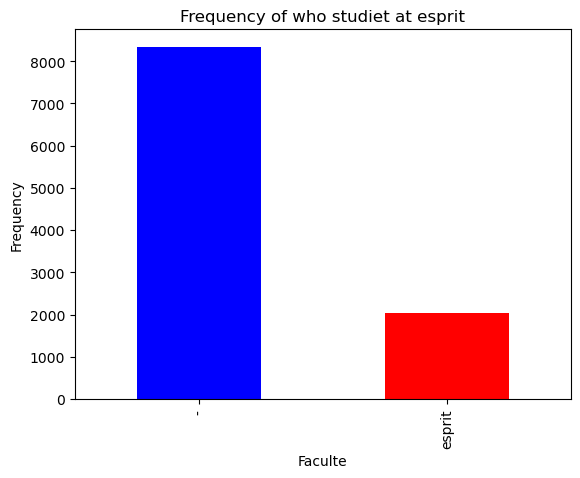

In [11]:
import matplotlib.pyplot as plt
counts = df['faculte'].value_counts()
colors = ['blue', 'red']
counts.plot(kind='bar',color=colors)
plt.title('Frequency of who studiet at esprit')
plt.xlabel('Faculte')
plt.ylabel('Frequency')
plt.show()

# Most Frequent jobs in the Collected Data 

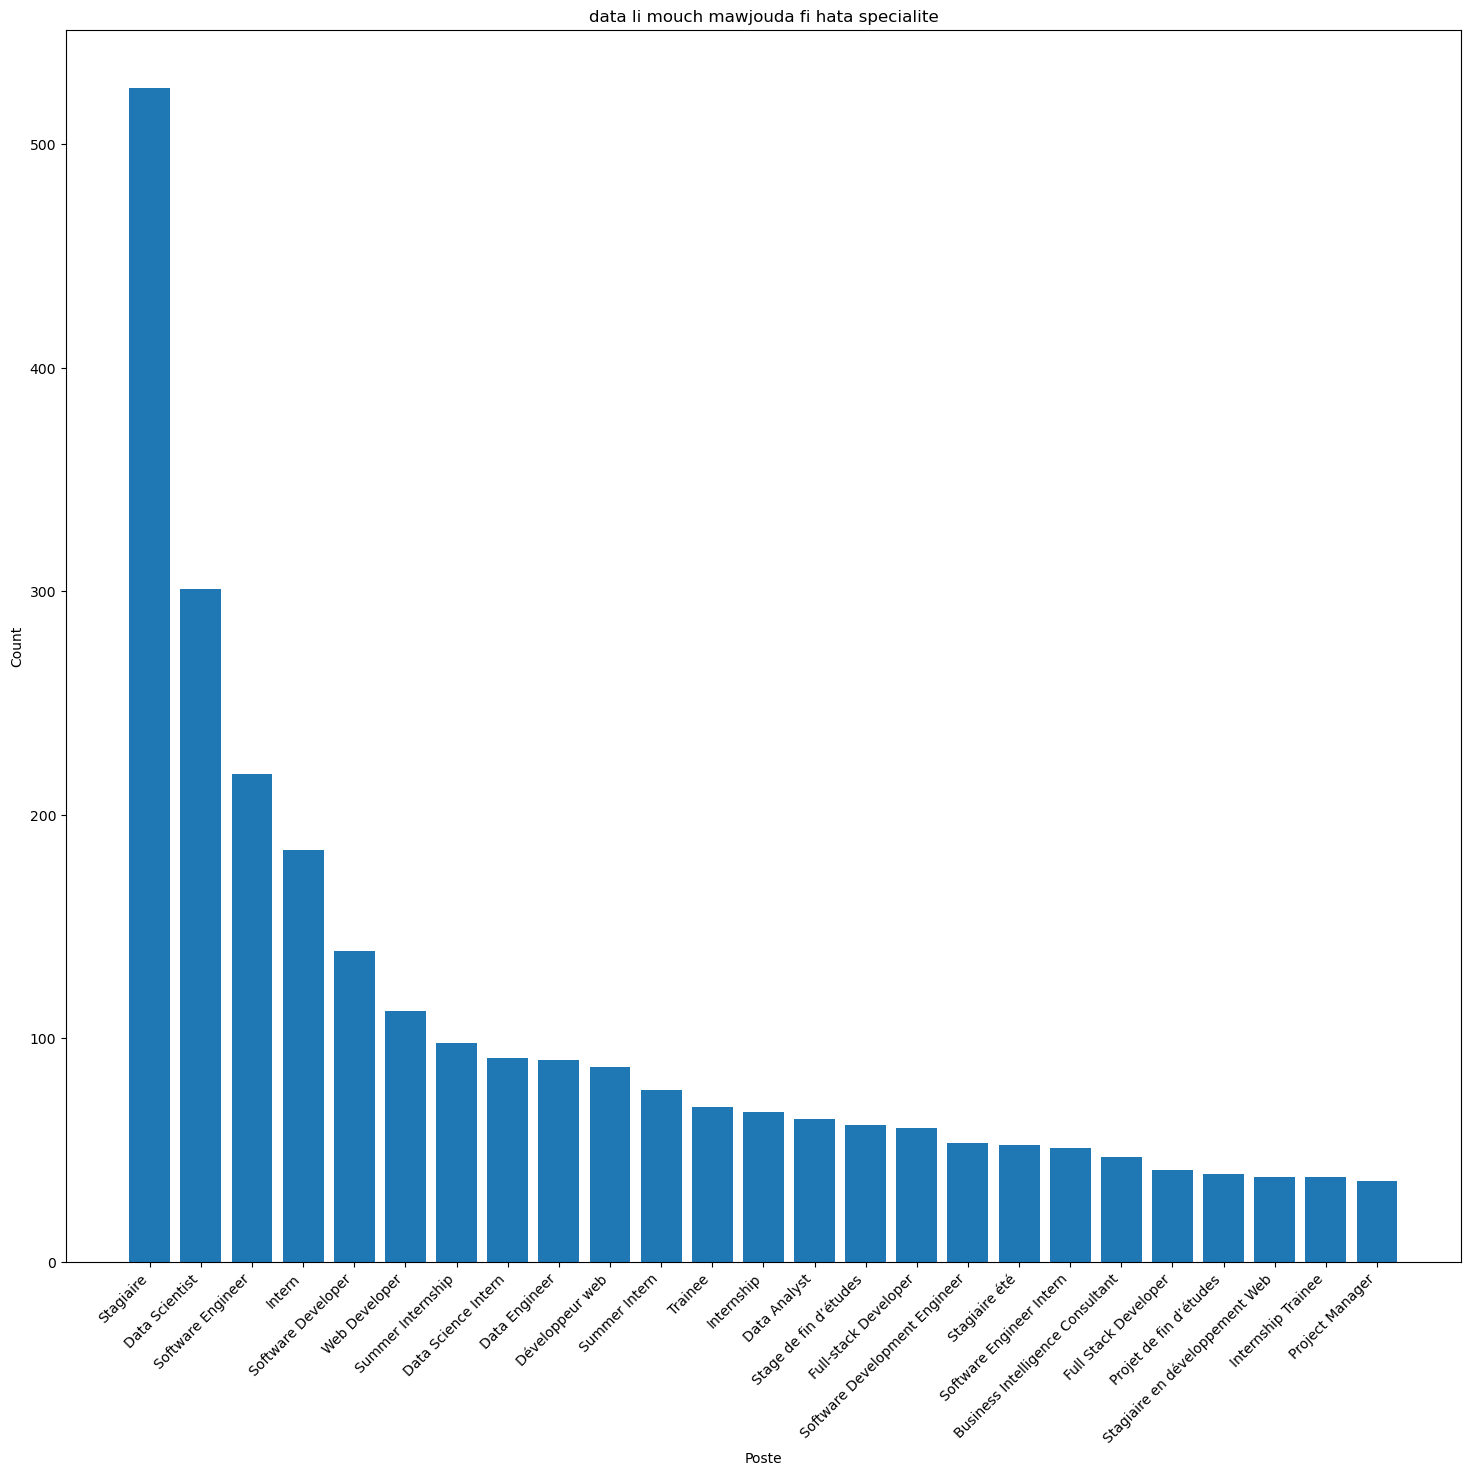

In [14]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = df['poste'].value_counts().nlargest(25)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


## Translating Data (job_description) to english 

In [ ]:
import dl_translate as dlt
import warnings
from langdetect import detect
warnings.filterwarnings('ignore')
mt = dlt.TranslationModel()
df["translated_description"]=""
for i in range(0,len(df)):
    # Define some example text
    text = df['description'][i]

    # Detect the language of the text
    lang = detect(text)
    if lang !='en':
        df['translated_description'][i]=mt.translate(df['description'][i], source=dlt.lang.FRENCH, target=dlt.lang.ENGLISH)
    else : 
        df['translated_description'][i]=df['description'][i]
df.to_excel('translated_data.xlsx')


## Reading translated data

In [283]:
import pandas as pd
df=pd.read_excel('translated_data.xlsx')

In [3]:
df.head()

,poste,company_name,date,description,faculte,translated_description
0,Artificial intelligence and Data Science engineer,Tassahil Center for Intelligent SolutionsTassa...,oct. 2020 - déc. 2022 · 2 ans 3 mois,Compétences Apprentissage automatique SPARQL ...,-,Skills Automatic Learning SPARQL Data grating ...
1,Data Analyst,Emrhod Consulting · Stage,août 2021 - sept. 2021 · 2 mois,Social media analysis Web scraping to extract ...,esprit,Social media analysis Web scraping to extract ...
2,python full stack developer / data scientist,ODDO BHF · Temps plein,avr. 2022 - aujourdhui · 11 mois,ma permis de trouver cet emploi,-,My permission to find this job.
3,Data scientist/ Python developer,Stars Airelines Services · Temps plein,janv. 2021 - avr. 2022 · 1 an 4 mois,Python developer building web applications usi...,-,Python developer building web applications usi...
4,Data Scientist,Tridevs · Stage,févr. 2020 - juil. 2020 · 6 mois,Compétences PySpark Docker python Deep learni...,-,PySpark Docker Python Deep Learning Machine Le...


## Using a json  file to delete rows where the experience do not belong to the IT field

In [4]:
import json
import warnings
warnings.filterwarnings('ignore')

with open('it_jobs.json') as f:
    IT_jobs = json.load(f)

new_df = pd.DataFrame()

for i in range(len(df)):
    found = False
    for job in IT_jobs:
        if job.upper() in df.iloc[i]['poste'].upper():
            found = True
            break
    if found:
        new_df = new_df.append(df.iloc[i])
    else:
        print("Deleting row ", i, ": ", df.iloc[i]['poste'])

df = new_df


Deleting row  2239 :  Environment artist/3D Visualization
Deleting row  2301 :  Business Coordinator
Deleting row  2303 :  Warehouse Management
Deleting row  2313 :  Business Partner / Directeur Pays
Deleting row  2335 :  Business Consulting & Communication
Deleting row  2336 :  Coach formatrice en Business
Deleting row  2343 :  Head of Application Services Business Line
Deleting row  2357 :  Coach en business & soft skills
Deleting row  2391 :  Communication & Business Manager
Deleting row  2404 :  Business Manager
Deleting row  2409 :  Business Manager
Deleting row  2454 :  Contractor in a small business
Deleting row  2481 :  Business Journalist
Deleting row  2509 :  Global HR Business Partner - Simcenter
Deleting row  2510 :  HR Business Partner
Deleting row  2512 :  Senior Director Business Transformation Sales EuroCentral
Deleting row  2513 :  HR Business Partner
Deleting row  2516 :  L&D Business Partner
Deleting row  2517 :  HR Business Partner
Deleting row  2519 :  Human Resour

Deleting row  4716 :  Expert SharePoint
Deleting row  4729 :  Knowledge Transfer Partner
Deleting row  4736 :  Desarrollo y administración de sistemas
Deleting row  4737 :  Desarrollador
Deleting row  4738 :  Desarrollador
Deleting row  4765 :  Graduate Student Researcher
Deleting row  4791 :  Managing Partner
Deleting row  4868 :  Microsoft Student Partner Lead
Deleting row  4869 :  Partner
Deleting row  4873 :  Art Director
Deleting row  4874 :  Art Director
Deleting row  4918 :  PHD Researcher
Deleting row  4981 :  Customer Care
Deleting row  5014 :  Marketing and Communication
Deleting row  5031 :  Artiste plasticien
Deleting row  5032 :  Responsable marketing
Deleting row  5034 :  Marketing
Deleting row  5053 :  Formarion
Deleting row  5073 :  Participant SAP Young Professionals Program (YPP)
Deleting row  5085 :  Chargée de projets marketing
Deleting row  5111 :  Researcher
Deleting row  5128 :  Chargé d'études juridiques
Deleting row  5129 :  Chargé d'études juridiques
Deleting 

Deleting row  6705 :  Chargée de recrutement
Deleting row  6707 :  Accounting Assistant - Visionarium
Deleting row  6711 :  Freelance
Deleting row  6714 :  Junior-entrepreneur
Deleting row  6723 :  Head of B2B Presales and Transversal Projects
Deleting row  6726 :  North Africa Sales Executive
Deleting row  6727 :  Deputy Manager of fixed networks for North and West Africa
Deleting row  6732 :  Opener
Deleting row  6735 :  active member
Deleting row  6739 :  Opener - Entrepreneur
Deleting row  6740 :  Head of Public Relations
Deleting row  6742 :  TM & MXP Manager
Deleting row  6743 :  incoming global talent and teaching team member
Deleting row  6746 :  Team Member
Deleting row  6748 :  Enseignante-Formatrice
Deleting row  6749 :  Projet PFE Licence
Deleting row  6753 :  Assistant Professor
Deleting row  6754 :  Graduate Teaching Assistant
Deleting row  6755 :  Graduate Teaching Assistant
Deleting row  6756 :  Assistant Professor / Scientific Advisor for Industry Applications
Deleting

Deleting row  7153 :  Co-founder and CIO
Deleting row  7154 :  HR Manager
Deleting row  7155 :  Chef du pôle communication
Deleting row  7156 :  Responsable Communication & Contenu
Deleting row  7157 :  Vice-présidente
Deleting row  7158 :  Responsable communications
Deleting row  7161 :  coordinatrice pédagogique
Deleting row  7164 :  Chef de projet
Deleting row  7165 :  Outreach & Communication Coordinator
Deleting row  7167 :  Treasurer
Deleting row  7169 :  Challenge INNOVCAT
Deleting row  7172 :  Directeur SAV
Deleting row  7173 :  B2B and B2C Sales Agent
Deleting row  7175 :  Online Lecturer
Deleting row  7176 :  Directeur magasin
Deleting row  7177 :  Fondateur / General Manager
Deleting row  7178 :  Chief Human Resource Officer
Deleting row  7179 :  Responsable Relations Extérieures
Deleting row  7180 :  Membre
Deleting row  7181 :  Membre
Deleting row  7182 :  Président
Deleting row  7185 :  Account Manager
Deleting row  7186 :  Inside Sales Representative
Deleting row  7187 :

Deleting row  7583 :  Projet tuteuré
Deleting row  7588 :  HR Manager
Deleting row  7590 :  Change Manager
Deleting row  7594 :  Insurance advisor
Deleting row  7602 :  Présidente
Deleting row  7603 :  Manager
Deleting row  7607 :  Ressources & Operations Manager
Deleting row  7609 :  Chef de projet
Deleting row  7613 :  Chef de Projet
Deleting row  7614 :  Ouvrier
Deleting row  7615 :  HR Service Center Manager
Deleting row  7616 :  Chef de service
Deleting row  7624 :  Chef de projet Responsable Système d’information
Deleting row  7635 :  Assistante Recrutement
Deleting row  7636 :  Assistante Administrative et RH
Deleting row  7641 :  Responsable communications
Deleting row  7642 :  Photographe
Deleting row  7645 :  Team leader
Deleting row  7646 :  Manager CST-Server & CST Effectiveness
Deleting row  7647 :  Manager CST Server
Deleting row  7648 :  Manager CST Server
Deleting row  7649 :  Delivery Manager du program ESP2 à HR Access
Deleting row  7652 :  Team leader support applica

Deleting row  8083 :  Senior Manager
Deleting row  8084 :  Assistant Voting Officer
Deleting row  8085 :  Global Head of Tax
Deleting row  8086 :  Group Head of Tax
Deleting row  8087 :  Group Tax Manager
Deleting row  8088 :  Tax Manager
Deleting row  8089 :  Tax Manager
Deleting row  8090 :  Customer Success Manager
Deleting row  8095 :  Bank Teller Agent
Deleting row  8122 :  Mémoire de Mastére de Recherche
Deleting row  8123 :  projet
Deleting row  8137 :  Project
Deleting row  8138 :  Formateur informatique
Deleting row  8143 :  Chercheuse
Deleting row  8147 :  Work Student
Deleting row  8153 :  Contractual Assistant
Deleting row  8164 :  English for communication former
Deleting row  8165 :  2D game creator
Deleting row  8166 :  debate
Deleting row  8185 :  TESOL instructor
Deleting row  8194 :  Space Manager
Deleting row  8200 :  SEO
Deleting row  8202 :  chef de projet
Deleting row  8205 :  Enseignant
Deleting row  8206 :  Formateur
Deleting row  8209 :  CEO & FOUNDER
Deleting 

Deleting row  8662 :  Formation
Deleting row  8663 :  Formation
Deleting row  8665 :  Ieee
Deleting row  8671 :  WTM Ambassador
Deleting row  8675 :  Opérateur de Production
Deleting row  8679 :  Tuteur android
Deleting row  8683 :  Organisatrice d'évènements professionnels
Deleting row  8684 :  Assistante achats
Deleting row  8686 :  Responsable service informatique
Deleting row  8687 :  Agent back office
Deleting row  8688 :  Co-Founder & CTO at PURA
Deleting row  8696 :  Co-Founder
Deleting row  8703 :  Membre
Deleting row  8704 :  Directeur d'agence
Deleting row  8705 :  Sales Manager
Deleting row  8706 :  Coordinateur
Deleting row  8707 :  PFA
Deleting row  8711 :  poste
Deleting row  8712 :  Teaching Assistant
Deleting row  8714 :  Présidente
Deleting row  8718 :  Volunteer
Deleting row  8720 :  Python instructor
Deleting row  8721 :  Co-founder & CTO
Deleting row  8722 :  Officer
Deleting row  8725 :  INGENIEUR
Deleting row  8727 :  Hiver & Co-Founder
Deleting row  8728 :  Co-Fo

Deleting row  9412 :  Mathematics Tutor
Deleting row  9414 :  Tutored Project
Deleting row  9416 :  Talent Resoucer
Deleting row  9419 :  Graduate Fellowship
Deleting row  9422 :  Crew Purser
Deleting row  9424 :  Présidente
Deleting row  9426 :  Academic Coordinator
Deleting row  9427 :  Team Lead
Deleting row  9432 :  Event Coordinator
Deleting row  9434 :  Human Resources Manager
Deleting row  9435 :  Independent HR Professional
Deleting row  9436 :  HR Manager (Freelance)
Deleting row  9437 :  Human Resources Manager
Deleting row  9438 :  HR Manager
Deleting row  9439 :  Product Line Director
Deleting row  9440 :  Product Line Director, FloMASTER Products
Deleting row  9446 :  Spring School Apprentice
Deleting row  9447 :  Apprentice
Deleting row  9448 :  CFO AT, CEE & CH
Deleting row  9449 :  Manager - Transaction Support
Deleting row  9451 :  Head of Performance Controlling
Deleting row  9452 :  Director
Deleting row  9454 :  UK People and Organisation Manager
Deleting row  9458 

Deleting row  9868 :  Vice President
Deleting row  9874 :  General Manager
Deleting row  9875 :  Deputy General Manager
Deleting row  9876 :  Task Force Director
Deleting row  9882 :  Campus Ambassador
Deleting row  9883 :  Campus Ambassador
Deleting row  9884 :  Graduate Msc in geophysics
Deleting row  9893 :  Production Team Leader
Deleting row  9897 :  C.E.O. Groupe et membre du conseil d'administration
Deleting row  9903 :  CEO
Deleting row  9904 :  CEO
Deleting row  9905 :  Masterthesis in modelling and numerical simulation at Eurocopter
Deleting row  9906 :  Membre Commission Nationale Sectorielle d'Informatique
Deleting row  9907 :  Assistant Professor
Deleting row  9909 :  Co-Founder
Deleting row  9910 :  Lecturer
Deleting row  9917 :  Instructional Designer
Deleting row  9921 :  Customer Advisor at BMW Group
Deleting row  9922 :  Enseignante formatrice permanente
Deleting row  9926 :  Sabbatical
Deleting row  9927 :  Head of Customer Value Management
Deleting row  9928 :  Lang

Deleting row  10346 :  Manager
Deleting row  10347 :  Chef de Flow distribution
Deleting row  10348 :  Customer Service Representative
Deleting row  10352 :  Membre de la JET Academy
Deleting row  10353 :  Membre d'Honneur
Deleting row  10354 :  Vice président
Deleting row  10355 :  Membre
Deleting row  10356 :  Membre
Deleting row  10357 :  Opener
Deleting row  10359 :  Chef de la logistique
Deleting row  10360 :  Formateur Merise et BDD
Deleting row  10361 :  Formateur Algo et Python
Deleting row  10362 :  Formateur C2i
Deleting row  10363 :  Auteur Scientifique
Deleting row  10364 :  Formateur C2i
Deleting row  10366 :  Responsable système d’information et chef de projet SAP
Deleting row  10367 :  Chef de projet Sage x3
Deleting row  10368 :  Responsable informatique et administrateur Sage x3
Deleting row  10369 :  Responsable informatique
Deleting row  10370 :  Administrateur réseau et systèmes
Deleting row  10381 :  Administrateur Système et Support.
Deleting row  10384 :  Directe

Deleting row  10940 :  Plannificatrice Appui chef de projet
Deleting row  11078 :  Administrateur systèmes et réseaux
Deleting row  11079 :  Administrateur système Windows/Linux
Deleting row  11204 :  Membre de l'équipe du tableau de bord
Deleting row  11205 :  Membre de l'équipe de communication
Deleting row  11369 :  Cruise, Naval Officer Cadet
Deleting row  11539 :  UX Lead
Deleting row  11642 :  ADMINISTRATEUR SYSTEME ET RESAUX ET SUPPORT INFORMATIQUE
Deleting row  11885 :  Botanical Guide Application
Deleting row  11978 :  Vice President & Managing Director Benelux
Deleting row  11980 :  Country Manager Benelux
Deleting row  12063 :  Formation en Cycle Excel Avancé : des Fonctions de Base aux Tableaux Croisés Dynamiques
Deleting row  12141 :  Responsable réseaux de vente indirect
Deleting row  12217 :  Chef d'équipe
Deleting row  12284 :  Réseaux et télécommunication
Deleting row  12313 :  Responsable d'équipe
Deleting row  12352 :  Appui au pilotage du portefeuille des Projets SI

In [7]:
df.to_excel('data_it_only.xlsx')

## Divide the initial data into subsets based on the job title and assign them to specialties 
### (Software Engineering, Data Science, ERP BI, Web Development, Financial IT, Artificial Intelligence)

In [288]:
df=pd.read_excel('data_it_only.xlsx')
len(df)

10608

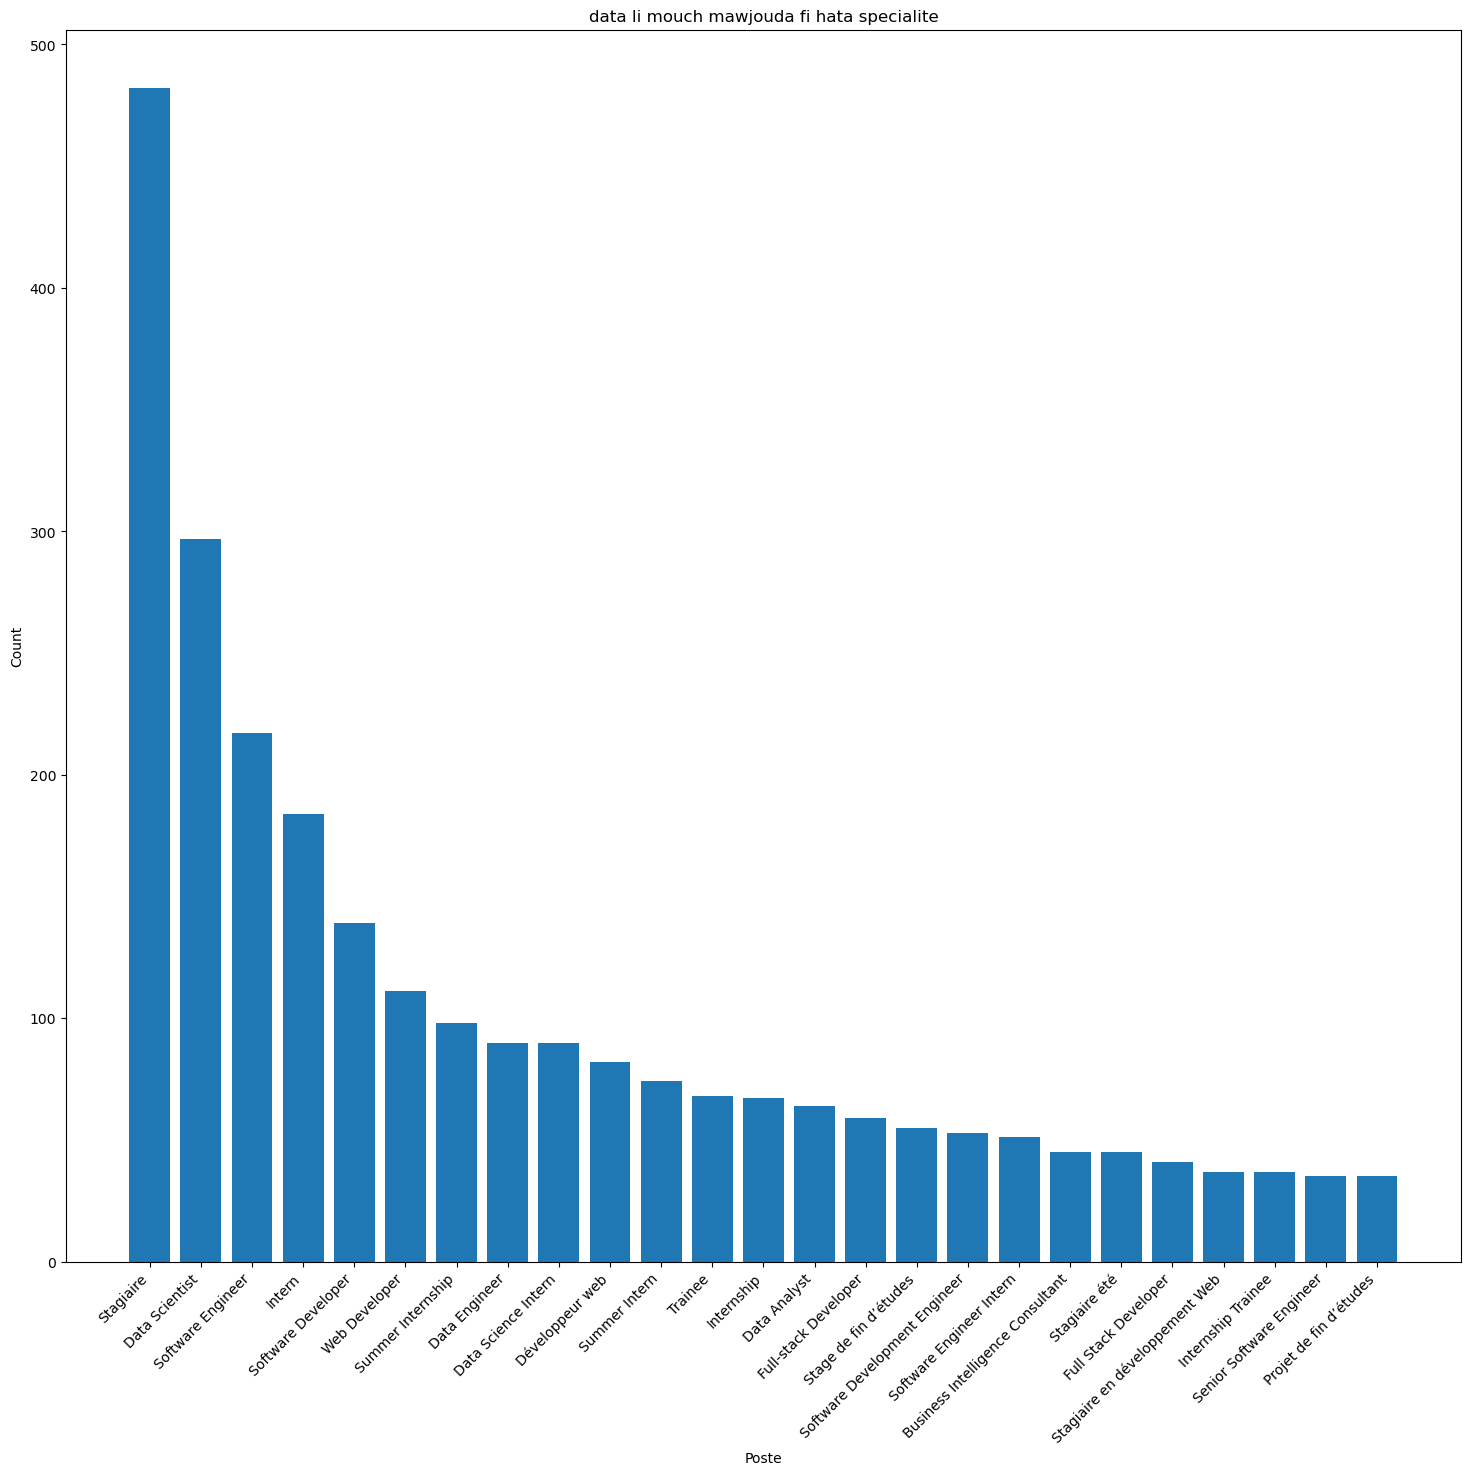

In [289]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = df['poste'].value_counts().nlargest(25)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


#### Data Science Specialty

In [290]:
DS=["Data","analyst","Machine learning","données","database","Statistical","statistics","statistic","DS","Scientist","Oracle","dba"]
ds = pd.DataFrame()
for i in range(len(df)):
    for job in DS:
        if job.upper() in df.iloc[i]['poste'].upper():
            ds=ds.append(df.iloc[i])
            

#### Most frequent jobs in the Data Science field

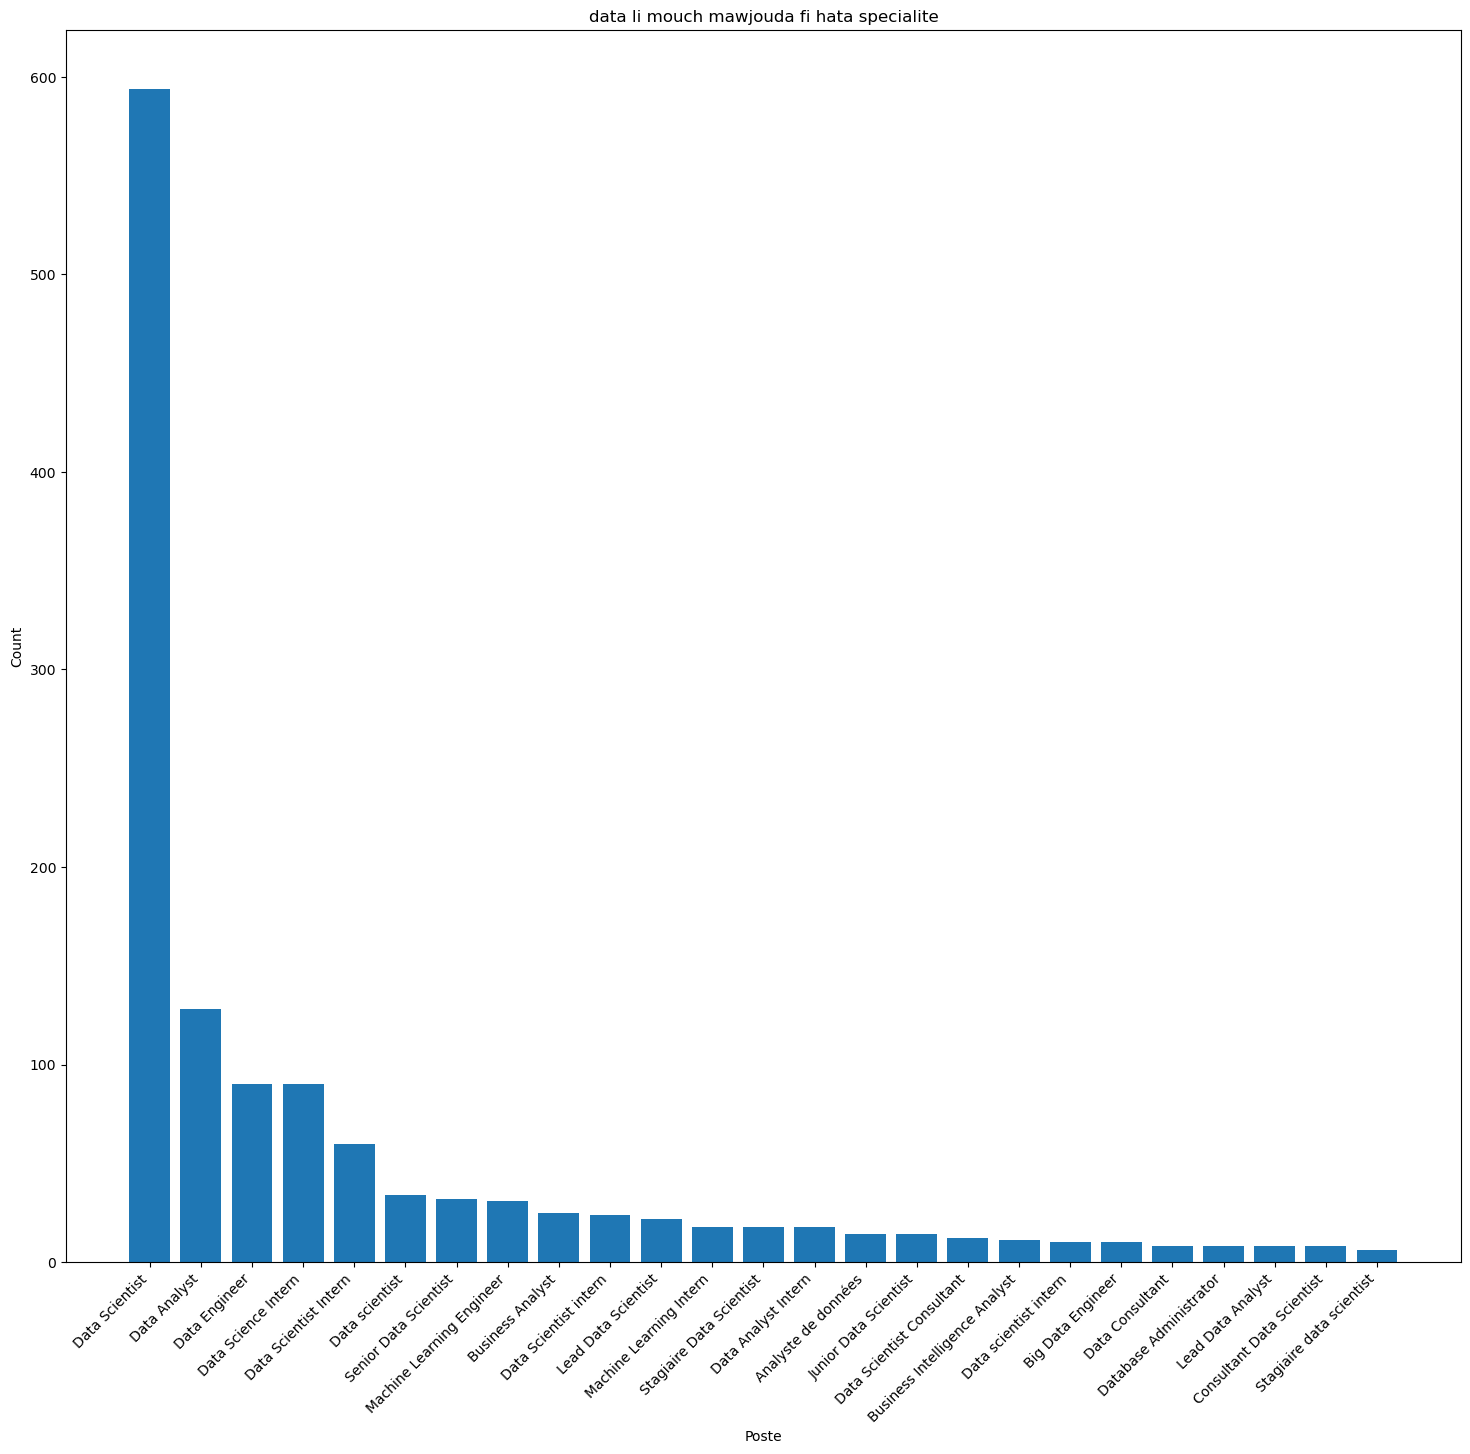

In [291]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = ds['poste'].value_counts().nlargest(25)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


#### ERP BI Specialty

In [204]:
BI=["consultant","BI","analyst","Visualization","warehouse","Business Intelligence","Business","Big Data","Business Intelligence","Dashboard","power"]
bi = pd.DataFrame()
for i in range(len(df)):
    for job in BI:
        if job.upper() in df.iloc[i]['poste'].upper():
            bi=bi.append(df.iloc[i])
            break

#### Most frequent jobs in the BI field

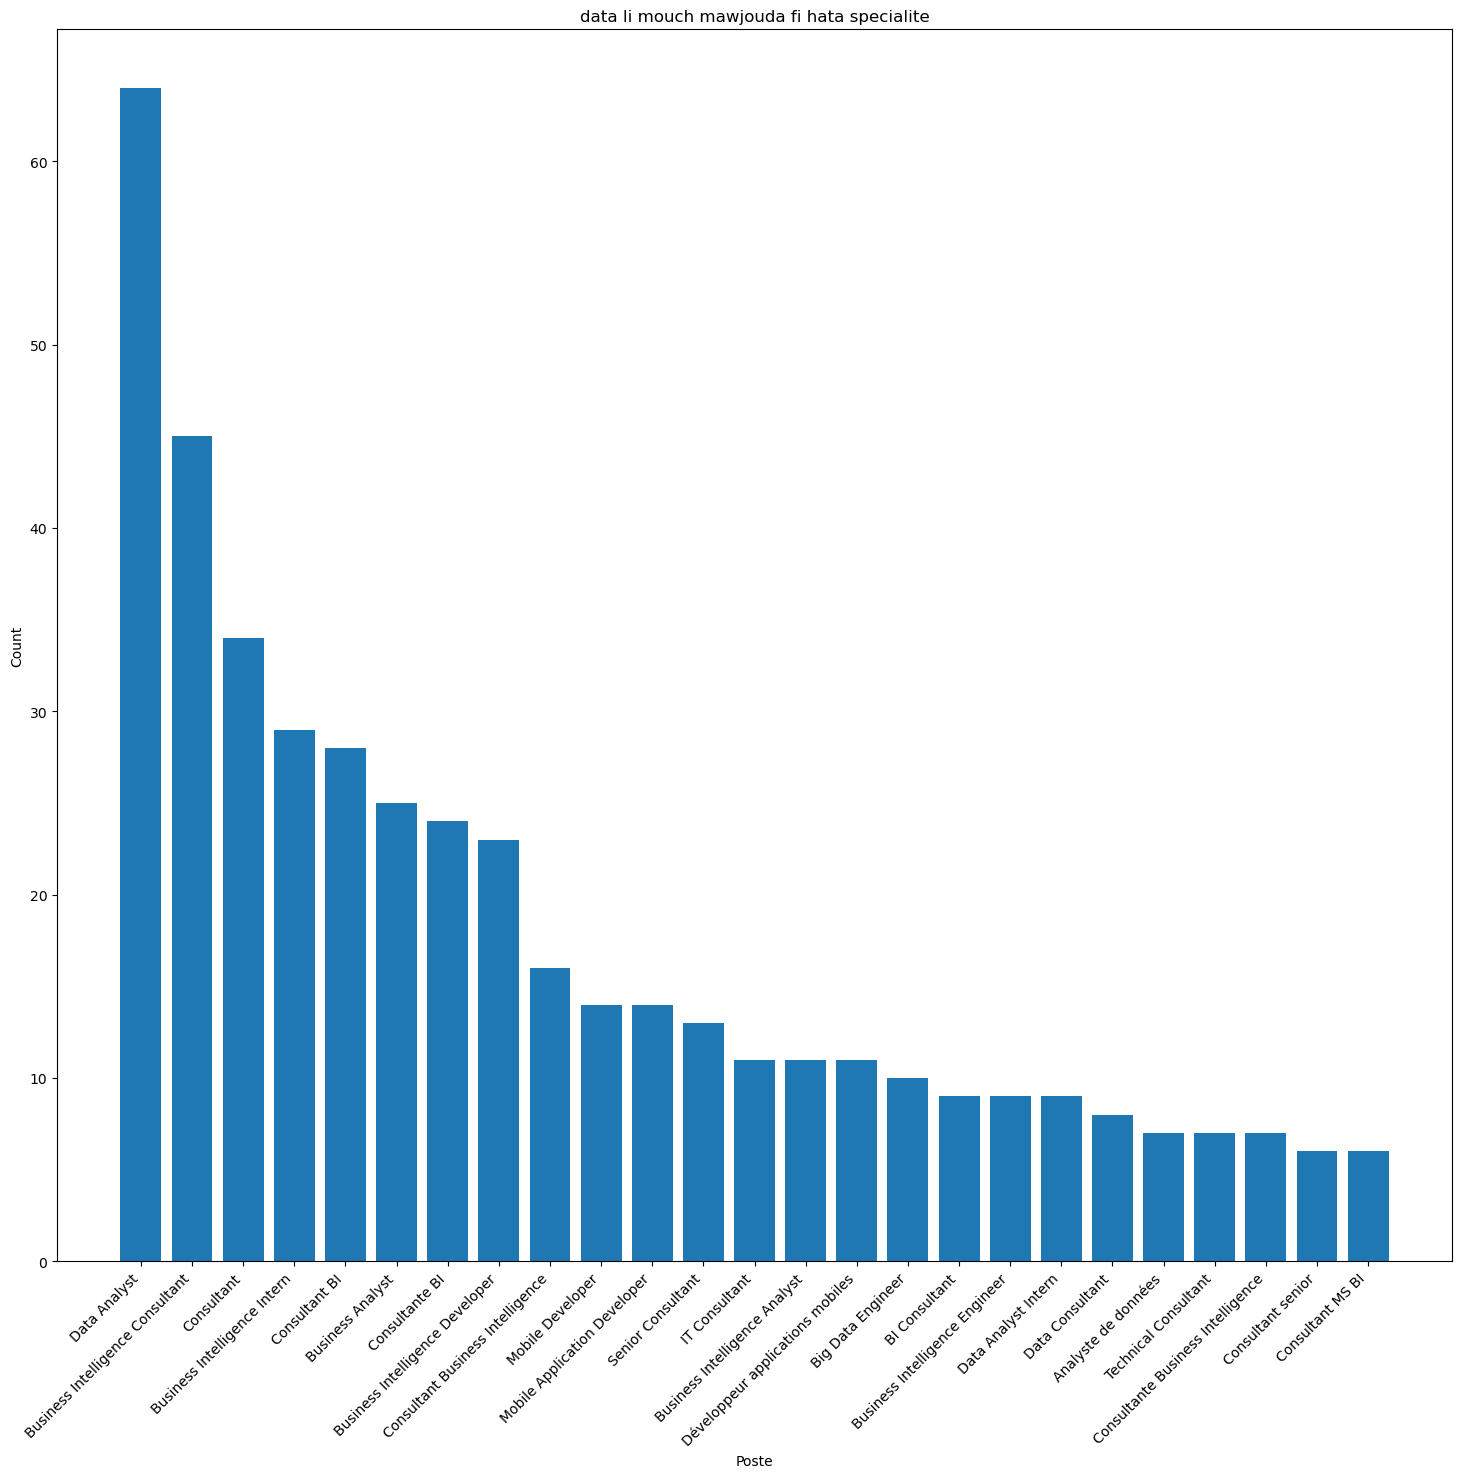

In [205]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = bi['poste'].value_counts().nlargest(25)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


#### Artificial Intelligence Specialty

In [178]:
AI=["deep","intelligence","artifical","artifical intelligence","processing","process","intelligence artificial","information technology","technologie de l'information","computer vision","data engineering","Robotics","Augmented Reality","electronic"]

ai = pd.DataFrame()
for i in range(len(df)):
    for job in AI:
        if job.upper() in df.iloc[i]['poste'].upper():
            ai=ai.append(df.iloc[i])
            break

#### Most frequent jobs in the Artificial Intelligence field

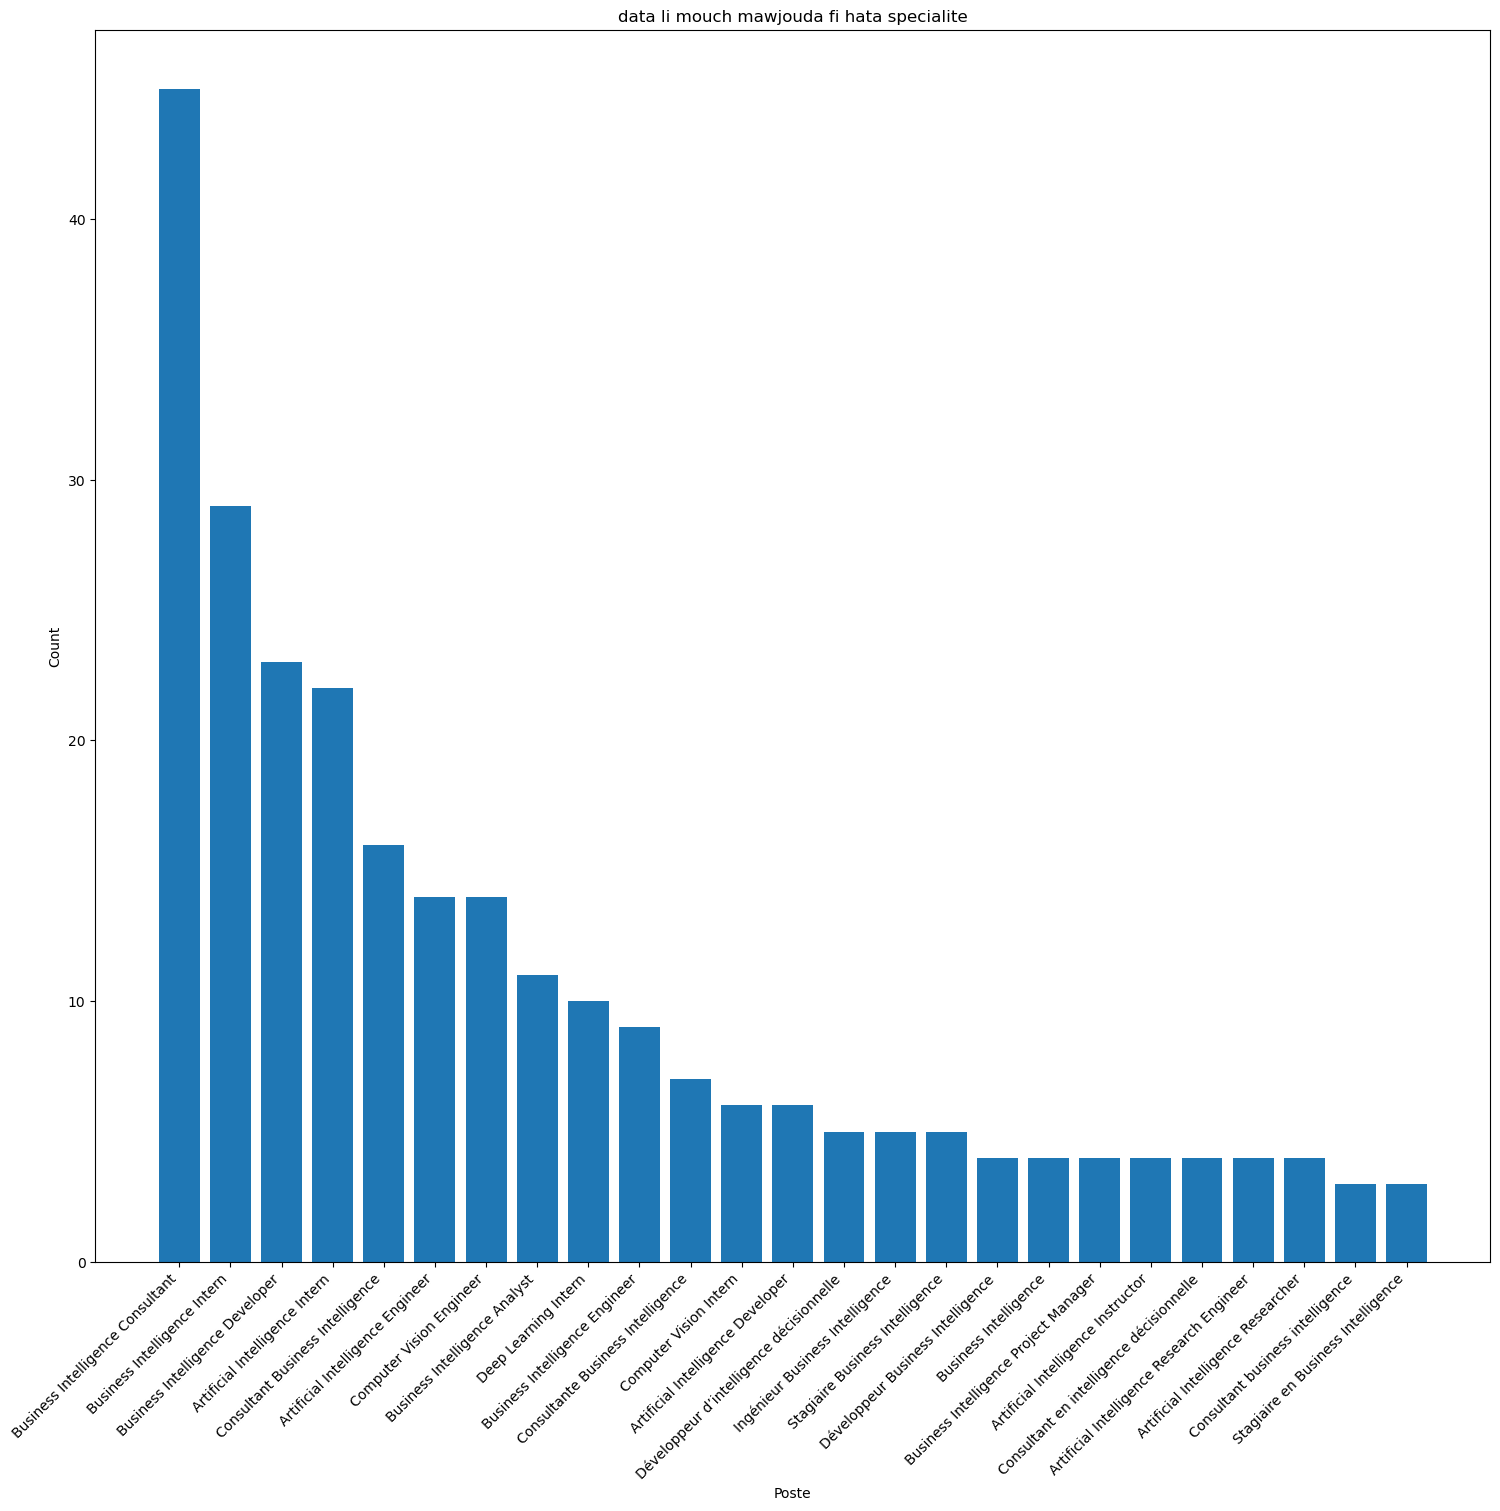

In [179]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = ai['poste'].value_counts().nlargest(25)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


#### Web Development Specialty 

In [182]:
TWIN=["web","frontend","Front-end ","backend","back-end ","fullstack","Frontend","Backend","Fullstack","UI","UX","developer","full","stack","jee","dev"]


twin=pd.DataFrame()
for i in range(len(df)):
    found = False
    for job in TWIN:
        if job.upper() in df.iloc[i]['poste'].upper():
            twin=twin.append(df.iloc[i])
            break

#### Most frequent jobs in the Web Development field

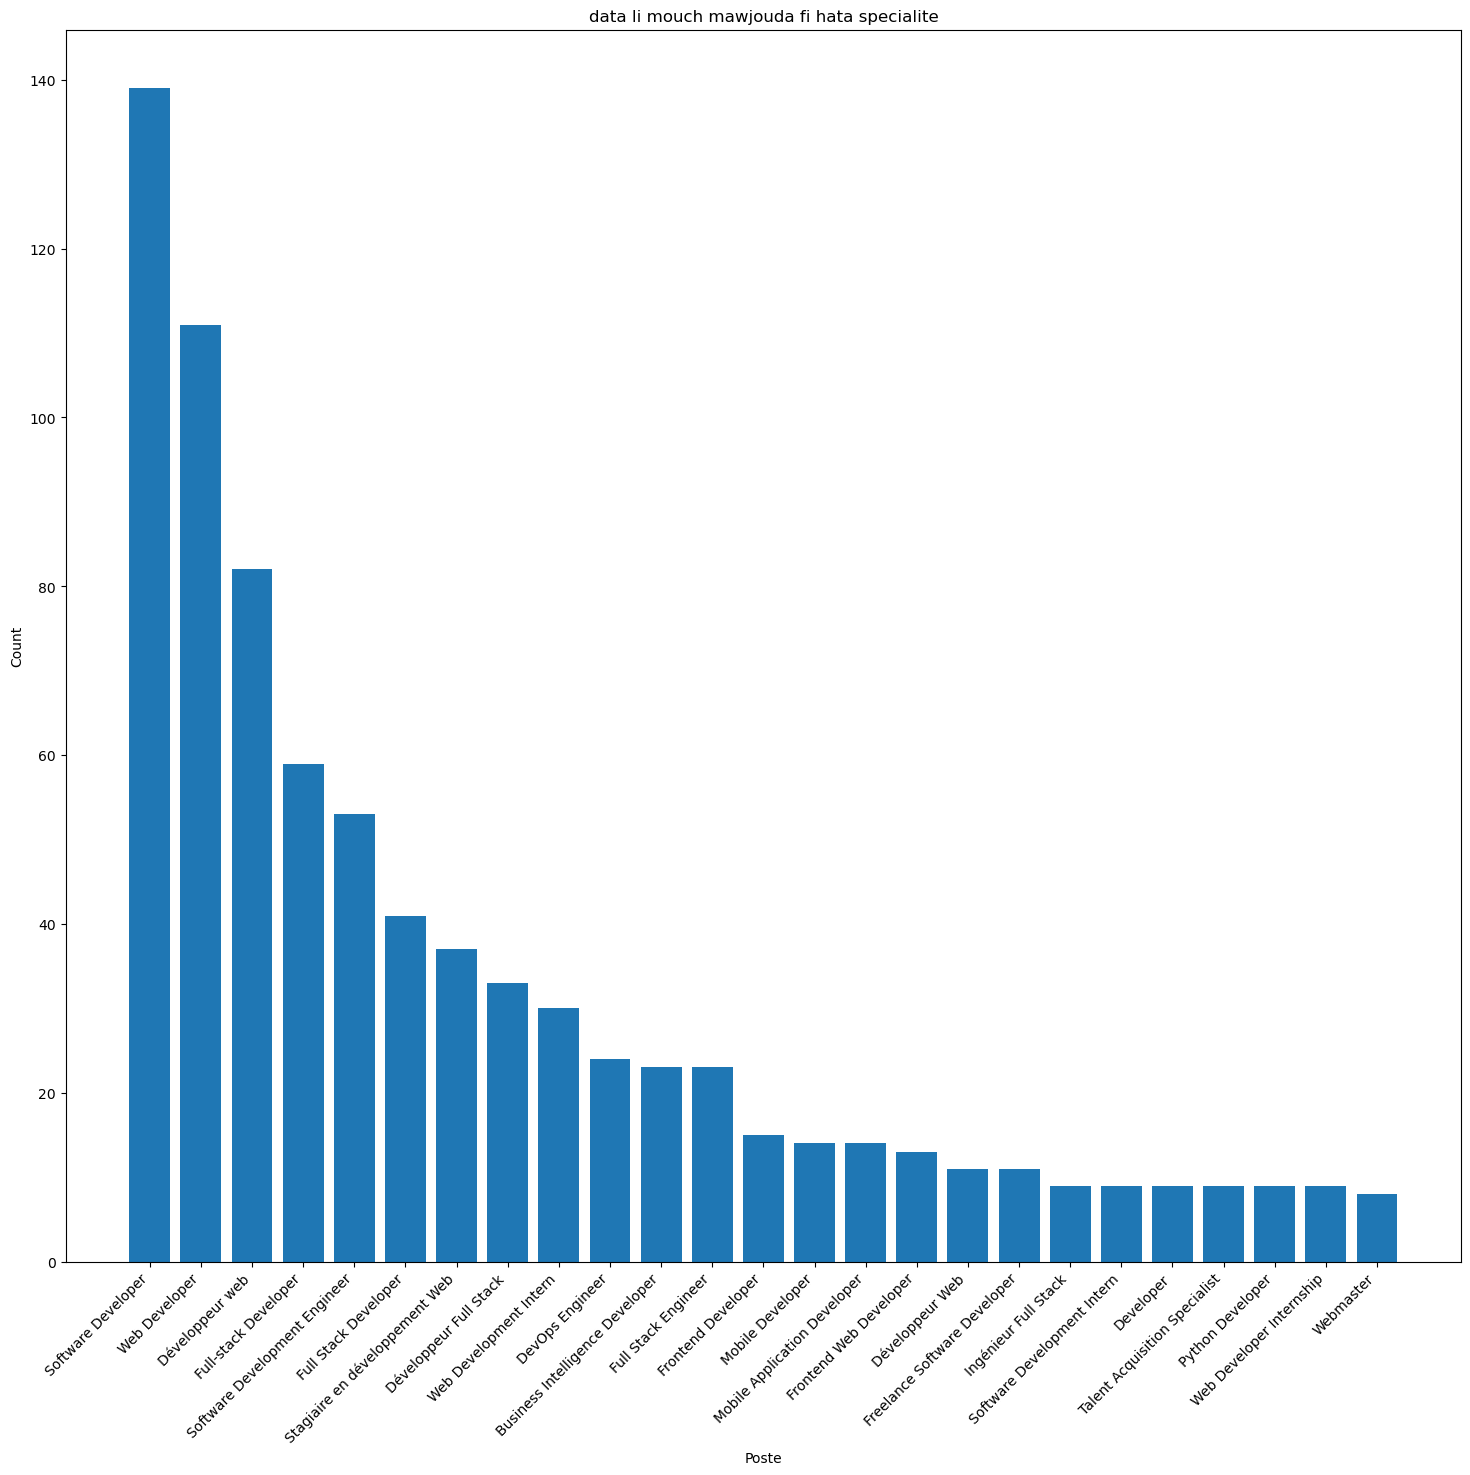

In [183]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = twin['poste'].value_counts().nlargest(25)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


### Financial IT Specialty

In [184]:
INFINIX=["Financial","financial","managment","finance","analyse financier","audit","auditeur","accounting","accountant","assurance","insurance"]
infinix = pd.DataFrame()
for i in range(len(df)):
    found = False
    for job in INFINIX:
        if job.upper() in df.iloc[i]['poste'].upper():
            infinix=infinix.append(df.iloc[i])
            break

#### Most frequent jobs in the Financial IT field

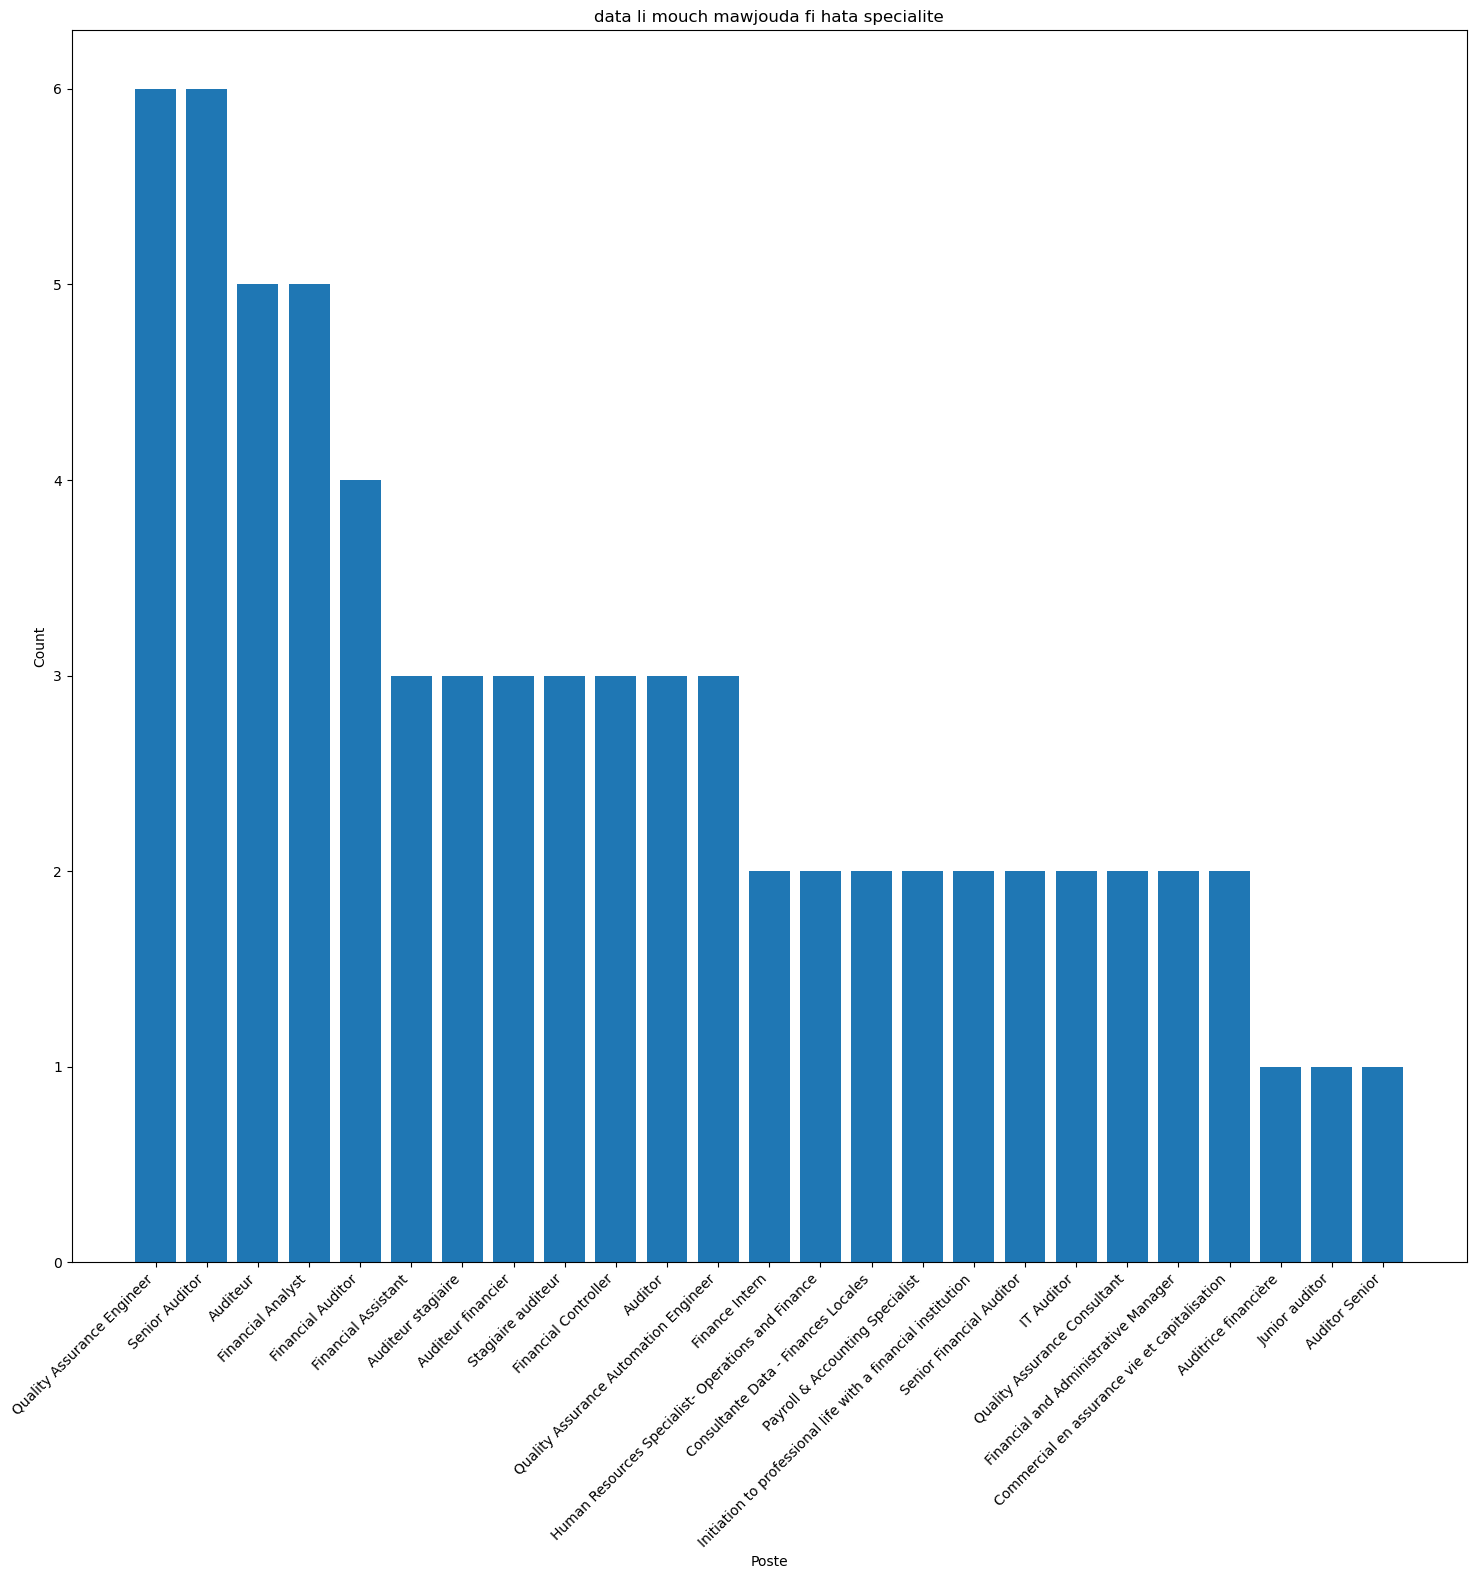

In [185]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = infinix['poste'].value_counts().nlargest(25)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


###  Software Engineering Specialty

In [186]:
GL=["Software","Developer","développement","Développeur","developer","architect","Devops",".Net","devops","Computer Science","logiciel","Test & Validation","test","product","soft","oppement"]
gl = pd.DataFrame()
for i in range(len(df)):
    found = False
    for job in GL:
        if job.upper() in df.iloc[i]['poste'].upper():
            gl=gl.append(df.iloc[i])
            break

#### Most frequent jobs in the Software Engineering field

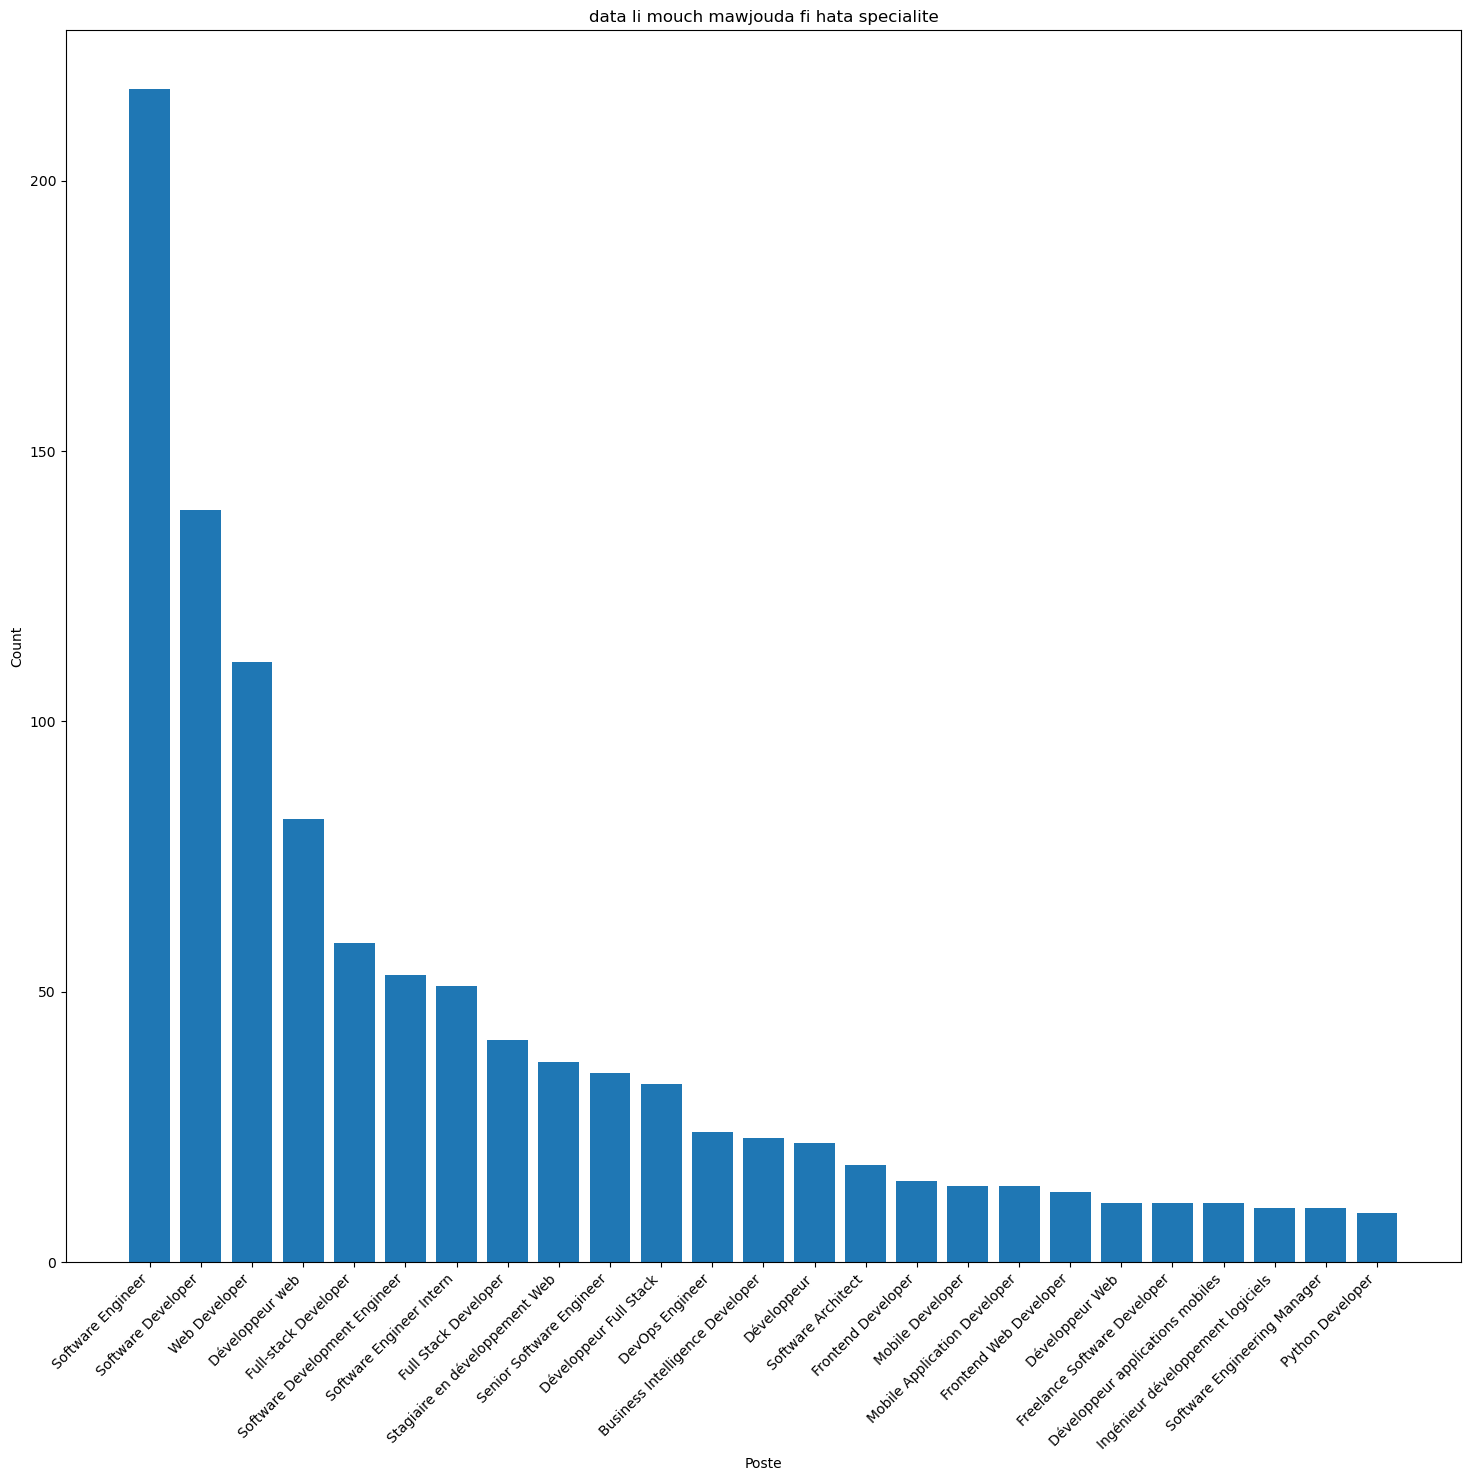

In [187]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = gl['poste'].value_counts().nlargest(25)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


# In this step, we will process experiences that have not been assigned to a specialty, typically these are internships.

In [247]:
test = pd.concat([ds,twin,infinix,bi,gl,ai]).drop_duplicates()
stage = df[~df.isin(test)].dropna()

## Saving al dataframes in xlsx files

In [ ]:
ds.to_excel('ds.xlsx')
ai.to_excel('ai.xlsx')
gl.to_excel('gl.xlsx')
twin.to_excel('twin.xlsx')
bi.to_excel('bi.xlsx')
infinix.to_excel('infini.xlsx')
intern.to_excel('stage.xlsx')

### as we see the most frequent job titles are internships so we will deal with this experiences later 

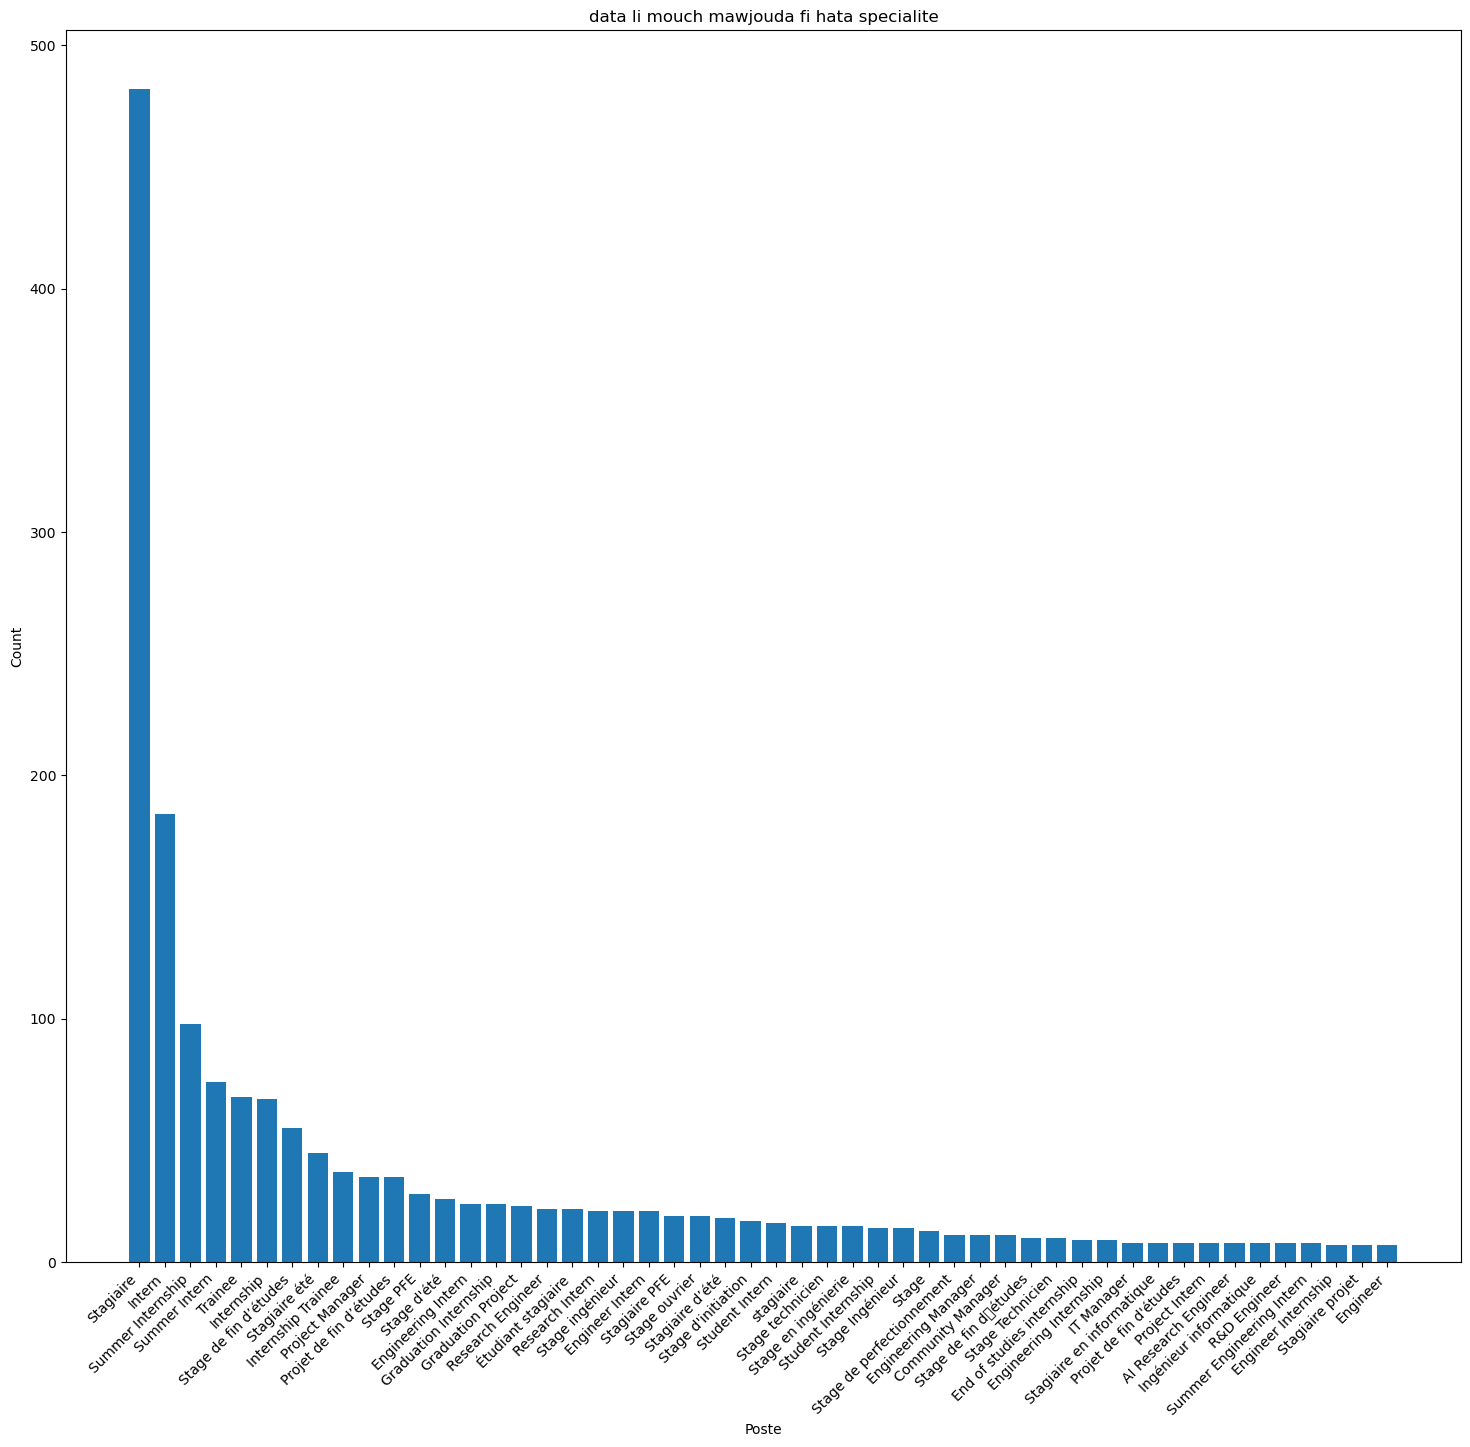

In [211]:
import matplotlib.pyplot as plt

# Get the 5 most frequent values in the 'poste' column
top_5_postes = stage['poste'].value_counts().nlargest(50)

# Plot a bar chart of the top 5 postes
plt.figure(figsize=(18,16))
plt.bar(top_5_postes.index, top_5_postes.values)
plt.xticks(rotation=45, ha='right')
plt.title('data li mouch mawjouda fi hata specialite')
plt.xlabel('Poste')
plt.ylabel('Count')
plt.show()


In [ ]:
intern=pd.read_excel('stage.xlsx')
for i in range(0,len(intern)):
    for job in all_titles:
        if job.upper() in intern['poste'][i].upper():
            intern['poste'][i]="stage"


In [259]:
intern['poste'].value_counts()

stage                                                                       2374
Trainee                                                                       68
Project Manager                                                               35
Research Engineer                                                             22
Community Manager                                                             11
                                                                            ... 
Labor Training                                                                 1
Lead Analytics & AI Solutions                                                  1
Tuteur à l'université en techniques joaillières et conseil en conception       1
Moniteur Universiaire                                                          1
IT and logistics Manager                                                       1
Name: poste, Length: 1060, dtype: int64

In [258]:
ds.to_excel('ds.xlsx')
ai.to_excel('ai.xlsx')
gl.to_excel('gl.xlsx')
twin.to_excel('twin.xlsx')
bi.to_excel('bi.xlsx')
infinix.to_excel('infini.xlsx')
intern.to_excel('stage.xlsx')

# Extracting Skills with Skillner
###  (A Pretrained Model for Named Entity Recognition (NER) to Extract Skills from Given Text)

In [10]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.matcher import Matcher

# load default skills data base
from skillNer.general_params import SKILL_DB
# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor
from  skillNer.matcher_class import SkillsGetter
from  skillNer.matcher_class import Matchers
import warnings
warnings.filterwarnings('ignore')



# init params of skill extractor
import en_core_web_sm

nlp = en_core_web_sm.load()
# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)




loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


### Extracting skills from data science dataframe that conatin only  experiences in the Data science field 

In [11]:
import pandas as pd
ds=pd.read_excel('ds.xlsx')
ds["skills"]=""
skills_ds=pd.DataFrame()
ds = ds.drop_duplicates()
ds = ds.reset_index(drop=True)
ds.head()


,poste,company_name,date,description,faculte,translated_description,skills
0,Artificial intelligence and Data Science engineer,Tassahil Center for Intelligent SolutionsTassa...,oct. 2020 - déc. 2022 · 2 ans 3 mois,Compétences Apprentissage automatique SPARQL ...,-,Skills Automatic Learning SPARQL Data grating ...,
1,Data scientist specialized in computer vision,Historiar · Temps plein,oct. 2019 - déc. 2021 · 2 ans 3 mois,Videos Background removal using image segmenta...,-,Videos Background removal using image segmenta...,
2,Artificial Intelligence & Machine Learning Eng...,ignifai · CDI,janv. 2020 - janv. 2023 · 3 ans 1 mois,Research and develop computer vision and machi...,-,Research and develop computer vision and machi...,
3,Part-time Data Scientist / computer vision sci...,DNA Global AnalyticsDNA Global Analytics,sept. 2020 - janv. 2021 · 5 mois,Both Assist in and developed a realtime AI sol...,esprit,Both Assist in and developed a realtime AI sol...,
4,R&D Management and Innovation - PhD student in...,University of Leeds,juin 2017 - mai 2021 · 4 ans,Set up and led research projects for developin...,-,Set up and led research projects for developin...,


In [12]:
for i in range(0,len(ds)):
    try :
        print("row_number:")
        print(i)
        data1 = skills_ds.drop(index=skills_ds.index)
        job_description=ds['translated_description'][i]
        annotations=skill_extractor.annotate(job_description)
        data1=skill_extractor.describe(annotations)
        ds['skills'][i]=data1['skill_name'].tolist()
        skills_ds = pd.concat([skills_ds, data1], ignore_index=True)
    except:
        print("error")


row_number:
0
row_number:
1


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
2


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
3


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
4


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
5
row_number:
6


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
7


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
8
row_number:
9


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
10


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
11


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
12


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
13


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
14
row_number:
15
row_number:
16


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
17


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
18
row_number:
19


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
20


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
21
row_number:
22


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
23


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
24


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
25


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
26


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
27


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
28
row_number:
29


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
30
row_number:
31


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
32
row_number:
33


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. Yo

row_number:
34


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
35


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
36
row_number:
37


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
38


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
39
row_number:
40


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
41


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
42
row_number:
43


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
44
row_number:
45


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
46
row_number:
47
row_number:
48


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
49
row_number:
50


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
51


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
52


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
53
row_number:
54
row_number:
55


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
56


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
57
row_number:
58


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
59


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
60
row_number:
61


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
62


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
63
row_number:
64


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
65


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
66


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
67
row_number:
68


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
69


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
70
row_number:
71
row_number:
72


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
73
row_number:
74


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
75


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
76
row_number:
77


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
78
row_number:
79


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
80
row_number:
81
row_number:
82


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
83


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
84
row_number:
85
row_number:
86


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
87


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
88


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
89


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
90
row_number:
91


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
92


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
93


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
94


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
95


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
96
row_number:
97


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
98
row_number:
99


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
100
row_number:
101


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
102
row_number:
103


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
104


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
105
row_number:
106


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
107
row_number:
108


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
109


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
110
row_number:
111


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
112


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
113
row_number:
114


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
115
row_number:
116
row_number:
117


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
118


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
119


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
120


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
121
row_number:
122


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
123
row_number:
124


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
125
row_number:
126


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
127
row_number:
128


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
129
row_number:
130


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
131
row_number:
132


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
133
row_number:
134
row_number:
135
row_number:
136


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
137
row_number:
138
row_number:
139


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
140


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
141


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
142


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
143
row_number:
144


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
145
row_number:
146


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
147


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
148
row_number:
149
row_number:
150


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the

row_number:
151


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
152
row_number:
153


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
154
row_number:
155


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
156


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
157
row_number:
158
row_number:
159
row_number:
160


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the

row_number:
161


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
162


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
163


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
164
row_number:
165
row_number:
166


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
167
row_number:
168
row_number:
169


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
170
row_number:
171
row_number:
172
row_number:
173


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
174


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
175


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
176


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
177


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
178
row_number:
179


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
180


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
181
row_number:
182


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
183


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
184


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
185
row_number:
186


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
187


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
188


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
189


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
190


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
191
row_number:
192
row_number:
193


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
194


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
195


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
196
row_number:
197


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)


row_number:
198


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
199


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
200


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
201


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
202
row_number:
203
row_number:
204
row_number:
205


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
206
row_number:
207


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
208
row_number:
209


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)


row_number:
210
row_number:
211
row_number:
212
row_number:
213
row_number:
214


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
215
row_number:
216


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
217


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)


row_number:
218


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
219


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
220


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
221
row_number:
222


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
223


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
224
row_number:
225


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
226


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
227


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
228


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
229


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
230
row_number:
231
row_number:
232
row_number:
233
row_number:
234


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
235


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
236
row_number:
237
row_number:
238
row_number:
239


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and onl

row_number:
240


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
241


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
242


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
243


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
244
row_number:
245


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
246


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
247


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
248


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
249


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
250


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
251
row_number:
252


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
253


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
254
row_number:
255


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
256


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
257


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
258


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
259


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
260


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
261
row_number:
262


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
263


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
264
row_number:
265


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
266


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
267


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
268


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
269


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
270


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
271
row_number:
272


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
273
row_number:
274
row_number:
275
row_number:
276


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
277


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
278


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
279
row_number:
280


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
281


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
282


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
283


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
284


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
285
row_number:
286


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
287


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
288


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
289


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
290


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
291
row_number:
292


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
293


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
294
row_number:
295


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
296


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
297
row_number:
298


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
299
row_number:
300


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
301


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
302
row_number:
303
row_number:
304


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
305


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
306


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
307


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)


row_number:
308


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
309


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
310


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
311
row_number:
312


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
313
row_number:
314
row_number:
315
row_number:
316


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)


row_number:
317


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
318


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
319


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
320


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
321


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
322
row_number:
323


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
324
row_number:
325


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
326


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
327


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
328


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
329


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
330


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
331


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
332


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
333


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
334


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
335


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
336
row_number:
337


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
338


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
339


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
340
row_number:
341


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
342


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
343


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
344


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
345


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
346


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
347


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
348


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
349


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
350


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
351
row_number:
352


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
353


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
354


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
355
row_number:
356


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
357
row_number:
358


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
359


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
360


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
361


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
362
row_number:
363


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
364
row_number:
365
row_number:
366


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
367


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
368
row_number:
369
row_number:
370


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
371
row_number:
372
row_number:
373


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
374


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
375


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
376


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
377
row_number:
378


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
379
row_number:
380


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
381
row_number:
382


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
383
row_number:
384


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
385
row_number:
386
row_number:
387


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)


row_number:
388


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
389
row_number:
390


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
391
row_number:
392


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
393


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
394
row_number:
395


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. Yo

row_number:
396
row_number:
397


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
398
row_number:
399
row_number:
400


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)


row_number:
401


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
402


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
403
row_number:
404


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
405
row_number:
406
row_number:
407


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
408
row_number:
409
row_number:
410


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
411
row_number:
412
row_number:
413
row_number:
414


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
415
row_number:
416


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
417
row_number:
418


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
419
row_number:
420
row_number:
421
row_number:
422


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
423
row_number:
424


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
425
row_number:
426


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
427


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
428
row_number:
429


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
430


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
431
row_number:
432


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
433
row_number:
434


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
435


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)


row_number:
436


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
437
row_number:
438
row_number:
439


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
440
row_number:
441
row_number:
442
row_number:
443


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
444
row_number:
445


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
446
row_number:
447


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
448


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
449
row_number:
450
row_number:
451


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
452
row_number:
453
row_number:
454


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)


row_number:
455
row_number:
456


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
457
row_number:
458


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
459


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
460
row_number:
461


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
462
row_number:
463


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
464
row_number:
465


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
466
row_number:
467


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
468
row_number:
469


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
470


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
471
row_number:
472


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
473
row_number:
474
row_number:
475


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
476
row_number:
477


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
478
row_number:
479


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
480
row_number:
481
row_number:
482


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
483
row_number:
484


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
485
row_number:
486


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
487


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
488
row_number:
489


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
490
row_number:
491


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
492
row_number:
493


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
494
row_number:
495


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)


row_number:
496


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
497


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
498


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
499
row_number:
500


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. Yo

row_number:
501
row_number:
502


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
503
row_number:
504
row_number:
505


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
506


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
507
row_number:
508


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. Yo

row_number:
509
row_number:
510


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word v

row_number:
511
row_number:
512


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
513


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
514


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
515
row_number:
516


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
517


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
518
row_number:
519


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
520
row_number:
521


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
522
row_number:
523


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
524


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
525


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
526


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
527


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
528
row_number:
529


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
530


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
531


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
532
row_number:
533
row_number:
534


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
535


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
536


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
537


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
538


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
539


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
540
row_number:
541
row_number:
542


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
543


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
544
row_number:
545


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
546
row_number:
547
row_number:
548


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
549


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
550
row_number:
551


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
552
row_number:
553


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
554


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
555
row_number:
556


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
557


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
558


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
559


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
560


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
561


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
562
row_number:
563


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
564


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
565


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
566


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
567


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
568


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
569


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
570


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
571
row_number:
572
row_number:
573


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
574


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)


row_number:
575


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
576


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
577


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
578
row_number:
579


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed f

row_number:
580


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
581
row_number:
582
row_number:
583


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
584
row_number:
585
row_number:
586


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

row_number:
587
row_number:
588
row_number:
589


C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_dict, ignore_index=True)
C:\Users\MSi\AppData\Roaming\Python\Python39\site-packages\skillNer\skill_extractor_class.py:258: FutureWarning: The frame.append method 

### Saving the result in two xlsx files 

In [13]:
ds.to_excel("skills_ds.xlsx")
skills_ds.to_excel("skills_ds_only.xlsx")

# output of skillNER On the Data Science Data 

#### here we have a Dataframe that contain skills in the Data Science filed with skill_name and the type of the skill 

In [129]:
skill_ds=pd.read_excel('skills_ds_only.xlsx')
skill_ds.head()

,Unnamed: 0,raw_text,skill_type,skill_name
0,0,SPARQL,Hard Skill,SPARQL Protocol And RDF Query Language (SPARQL)
1,1,docker,Hard Skill,Docker (Software)
2,2,mongodb,Hard Skill,MongoDB
3,3,data analysis,Hard Skill,Financial Data Analysis
4,4,postgresql,Hard Skill,PostgreSQL


#### here we have a Dataframe that contain skills in the Data Science filed with a list of skills in evry experience 
##### this will help us identify required skills in evey job title and have an overview on the frequency of skills over time 

In [130]:
all_ds=pd.read_excel('ds_skills.xlsx')
all_ds.head()

,Unnamed: 0,poste,company_name,date,description,faculte,translated_description,skills
0,0,Artificial intelligence and Data Science engineer,Tassahil Center for Intelligent SolutionsTassa...,oct. 2020 - déc. 2022 · 2 ans 3 mois,Compétences Apprentissage automatique SPARQL ...,-,Skills Automatic Learning SPARQL Data grating ...,['SPARQL Protocol And RDF Query Language (SPAR...
1,1,Data Analyst,Emrhod Consulting · Stage,août 2021 - sept. 2021 · 2 mois,Social media analysis Web scraping to extract ...,esprit,Social media analysis Web scraping to extract ...,"['Social Media', 'Web Scraping', 'Social Media..."
2,2,python full stack developer / data scientist,ODDO BHF · Temps plein,avr. 2022 - aujourdhui · 11 mois,ma permis de trouver cet emploi,-,My permission to find this job.,[]
3,3,Data scientist/ Python developer,Stars Airelines Services · Temps plein,janv. 2021 - avr. 2022 · 1 an 4 mois,Python developer building web applications usi...,-,Python developer building web applications usi...,"['Python (Programming Language)', 'Web Applica..."
4,4,Data Scientist,Tridevs · Stage,févr. 2020 - juil. 2020 · 6 mois,Compétences PySpark Docker python Deep learni...,-,PySpark Docker Python Deep Learning Machine Le...,"['Pyspark', 'Docker (Software)', 'Python (Prog..."


# We will now use the Naive Bayes Classifier to categorize each internship.
### We will compute the probability that an internship is in the Data Science field, given that the individual used Python and Flask during the internship.

In [20]:
internship=pd.read_excel('stage.xlsx')
internship['category']=" "
internship.head()

,poste,company_name,date,description,faculte,translated_description,category
0,AI project Manager,Tassahil Center for Intelligent SolutionsTassa...,janv. 2022 - déc. 2022 · 1 an,Compétences Scrum,-,Skills of Scrum,
1,stage,HNC&d · Stage,févr. 2020 - juil. 2020 · 6 mois,Réalisation dune plateforme danalyses des sent...,-,Implementation of a Danish Feeling Platform fr...,
2,stage,DITRIOT · Stage,juil. 2019 - août 2019 · 2 mois,Réalisation dun robot assistant à laide des AP...,-,IBM Watson Technology NodeJS STT TTS Watson As...,
3,stage,ESPRIT (Ecole Supérieure Privée d'Ingénierie e...,juil. 2021 - août 2021 · 2 mois,Mots clés SQL UML HTML5 CSS Symfony,esprit,Keywords SQL UML HTML5 CSS Symfony,
4,Visiting Researcher,Université Laval · Stage,févr. 2022 - sept. 2022 · 8 mois,Proposed to optimize the computational resourc...,-,Proposed to optimize the computational resourc...,


In [22]:
ds_data = pd.read_excel("skills_ds_only.xlsx")
bi_data = pd.read_excel("skills_bi_only.xlsx")
twin_data = pd.read_excel("skills_twin_only.xlsx")
ai_data = pd.read_excel("skills_ai_only.xlsx")
gl_data = pd.read_excel("skills_gl.xlsx")
infini_data = pd.read_excel("infini_skills.xlsx")

# Assign category to each dataset
ds_data['category'] = 'ds'
bi_data['category'] = 'bi'
twin_data['category'] = 'twin'
ai_data['category'] = 'ai'
gl_data['category'] = 'gl'
infini_data['category'] = 'infini'
X_test_vec=["aa","power","finance"]

# Concatenate all datasets
df = pd.concat([ds_data, bi_data, twin_data,ai_data,gl_data,infini_data])

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(df['skill_name'], df['category'], test_size=0.2, random_state=42)

# Preprocess the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# Train a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred=nb.predict(X_test_vec)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 score: {f1:.3f}")
# Predict the category of a list of words
words =[name_list]
words_vec = vectorizer.transform(words)
probs = nb.predict_proba(words_vec)

# Print the predicted category and its probability
for i, word in enumerate(words):
    print(f"Probabilities for '{word}':")
    for j, category in enumerate(nb.classes_):
        print(f"  {category}: {probs[i][j]}")
# Calculate the total probabilities for each category
category_probs = {category: 0 for category in nb.classes_}
for i, word in enumerate(words):
    for j, category in enumerate(nb.classes_):
        category_probs[category] += probs[i][j]

# Determine the category with the highest total probability
max_prob = max(category_probs.values())
predicted_category = [k for k, v in category_probs.items() if v == max_prob][0]
print(f"The list belongs to the '{predicted_category}' category")

F1 score: 0.299
Probabilities for 'aa':
  ai: 0.061432707648066805
  bi: 0.22272557168462304
  ds: 0.2266451320635796
  gl: 0.27549191467570067
  infini: 0.01967658702802782
  twin: 0.194028086900002
Probabilities for 'power':
  ai: 0.11034273136968528
  bi: 0.5090723167391524
  ds: 0.20943213481288198
  gl: 0.10924598239607206
  infini: 0.000985799574707993
  twin: 0.060921035107499875
Probabilities for 'finance':
  ai: 0.06544423668672142
  bi: 0.2981247708858176
  ds: 0.24584046242494992
  gl: 0.15206697658625734
  infini: 0.06431451340857593
  twin: 0.17420904000767817
The list belongs to the 'bi' category
